In [92]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# figure(figsize=(15, 8), dpi=80)
%matplotlib inline

In [93]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [94]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path=os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

In [95]:
fetch_housing_data()

In [96]:

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [97]:
housing = load_housing_data()

In [98]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [99]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [100]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


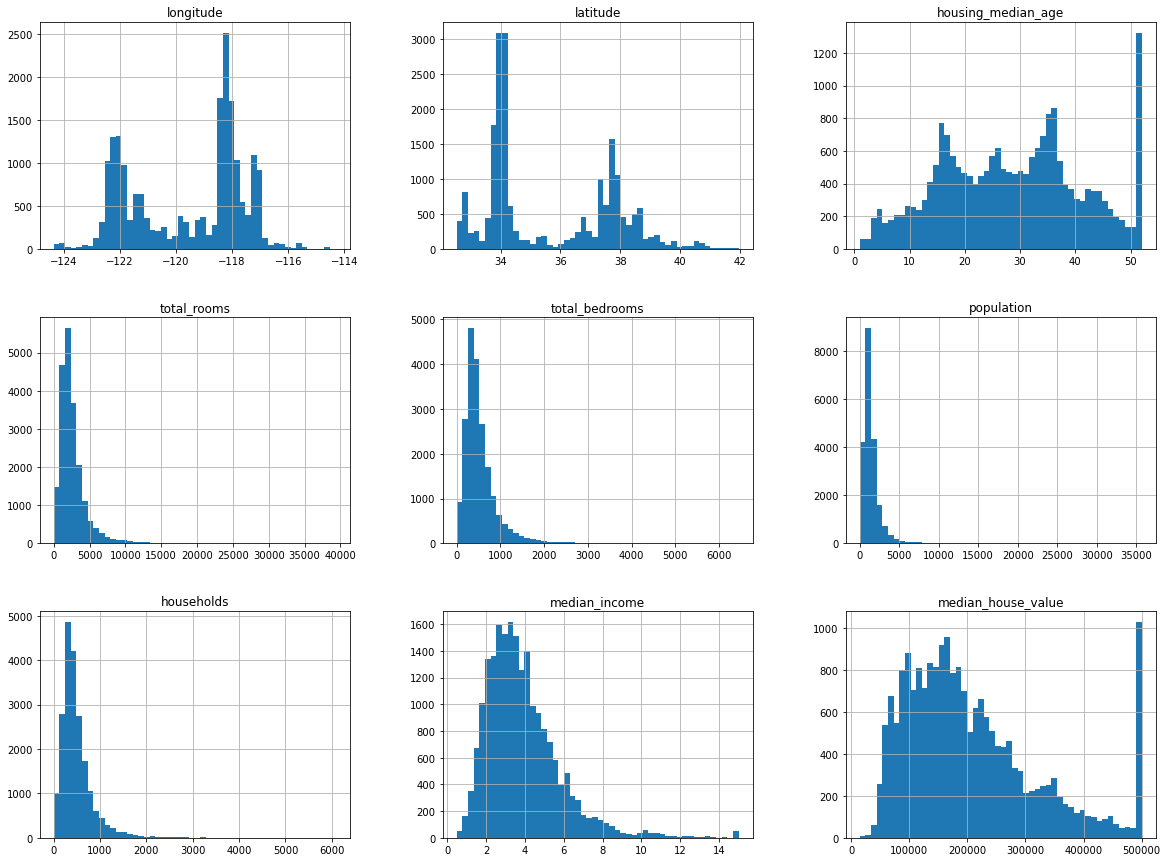

In [101]:
housing.hist(bins=50, figsize=(20,15));
#plt.show()

median_age and median_house_value are capped, Caping of value could lead to problems, considering the ML algorithm may learn that the prices never go beyond the limit.

Many attributes histogram is tail-heavy, i.e. they extend much farther to the right of the median than to the left. this may lead to skewed pattern detection. It is preferred to have mode bell shaped distribution.

In [102]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [103]:
train_set, test_set = split_train_test(housing, 0.2)

In [104]:
len(train_set)

16512

In [105]:
len(test_set)

4128

This seems to be a perfect way to divide the train and test set, but the problem is that when the program runs again and again, it will generate a different set everytime, which eventually is seen by the ml algorithm and that is something that we would want to avoid.

In [106]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

The train and test split is a stratified sampling, which means the data is divided into homogenous sub-groups called strata and the right number of instances are sampled from each stratum to guarantee that the test set is representative of the whole data.

If random sampling is done then there is a high chance of sampling a skewed test set in either direction of the label attribute.

Considering that we know median_income is an attribute with high importance to predict housing prices. We would want to make sure that the test set is representative of the various categories of income in the whole dataset.

Thus we are going to various categories of income as the median_income is a continuous numeric attribute.

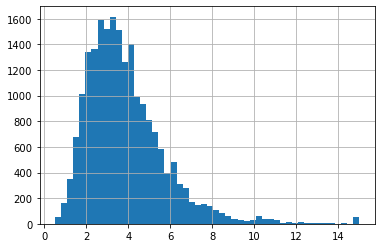

In [107]:
housing['median_income'].hist(bins=50);

Based on the histogram, we could see the distribution of median_income is clustered around 1.5 to 6. 

In [108]:
housing['income_category'] = pd.cut(housing["median_income"], bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                                   labels=[1,2,3,4,5])

(1.0, 5.0)

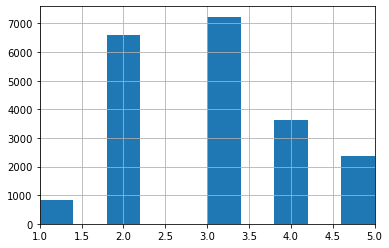

In [109]:
housing["income_category"].hist()
plt.xlim(xmin=1, xmax = 5)

In [110]:
from sklearn.model_selection import StratifiedShuffleSplit

In [111]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [112]:
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_category, dtype: float64

In [113]:
housing["income_category"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

In [114]:
def income_category_proportions(data):
    return data["income_category"].value_counts() / len(data)


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_proportions = pd.DataFrame({"Overall" : income_category_proportions(housing),
                                   "Stratified" : income_category_proportions(strat_test_set),
                                    "Random" : income_category_proportions(test_set)
                                   }).sort_index()
compare_proportions["Rand % error"] = 100 * compare_proportions["Random"] / compare_proportions["Overall"] - 100
compare_proportions["Strat % error"] = 100 * compare_proportions["Stratified"] / compare_proportions["Overall"] - 100

In [115]:
compare_proportions

,Overall,Stratified,Random,Rand % error,Strat % error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


    Removing the income_category attribute so that the data is back to its original form.

In [116]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

In [117]:
housing = strat_train_set.copy()

<Figure size 1080x576 with 0 Axes>

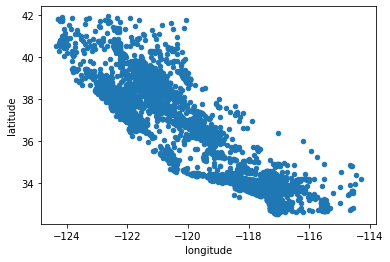

<Figure size 1080x576 with 0 Axes>

In [118]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.figure(figsize=(15, 8))

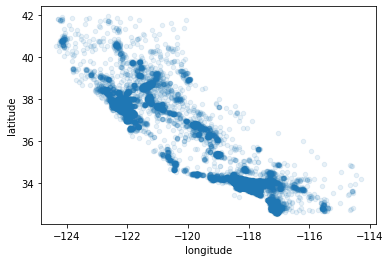

In [119]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

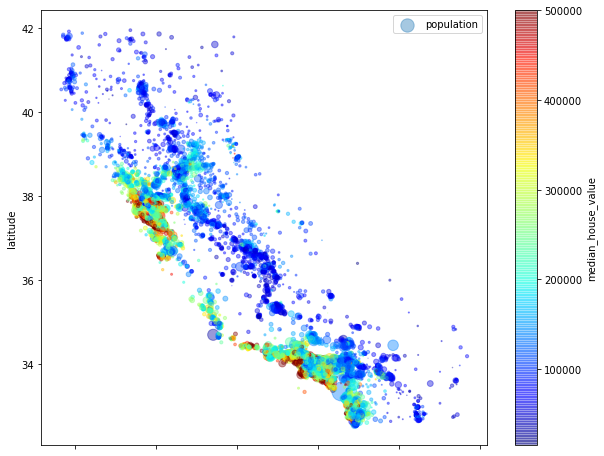

In [120]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, label="population", figsize=(10,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, legend=True)


    Correlation Matrix between all every pair of attribute

Download the california Image

In [121]:
!pwd

/Users/rahuladlakha/Documents/Github/Aurelien_ML_Keras_TensorFlow


In [122]:
image_path = os.path.join("images", "e2e_project")
os.makedirs(image_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(image_path, filename))

('images/e2e_project/california.png',
 <http.client.HTTPMessage at 0x7fefd2b37b80>)

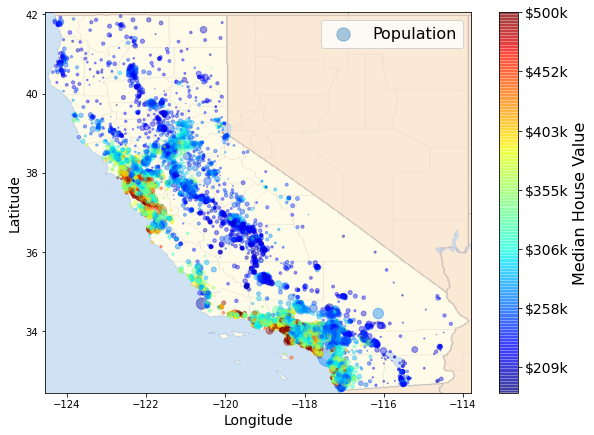

In [123]:
import matplotlib.image as mpimg
import os
california_img = mpimg.imread(os.path.join(image_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                 s=housing["population"]/100, label="Population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
          cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]

tick_values=np.linspace(prices.min(), prices.max(), 11)

cbar = plt.colorbar(ticks=tick_values/prices.max())

cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)

cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)


In [124]:
corr_matrix = housing.corr()

In [125]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [126]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

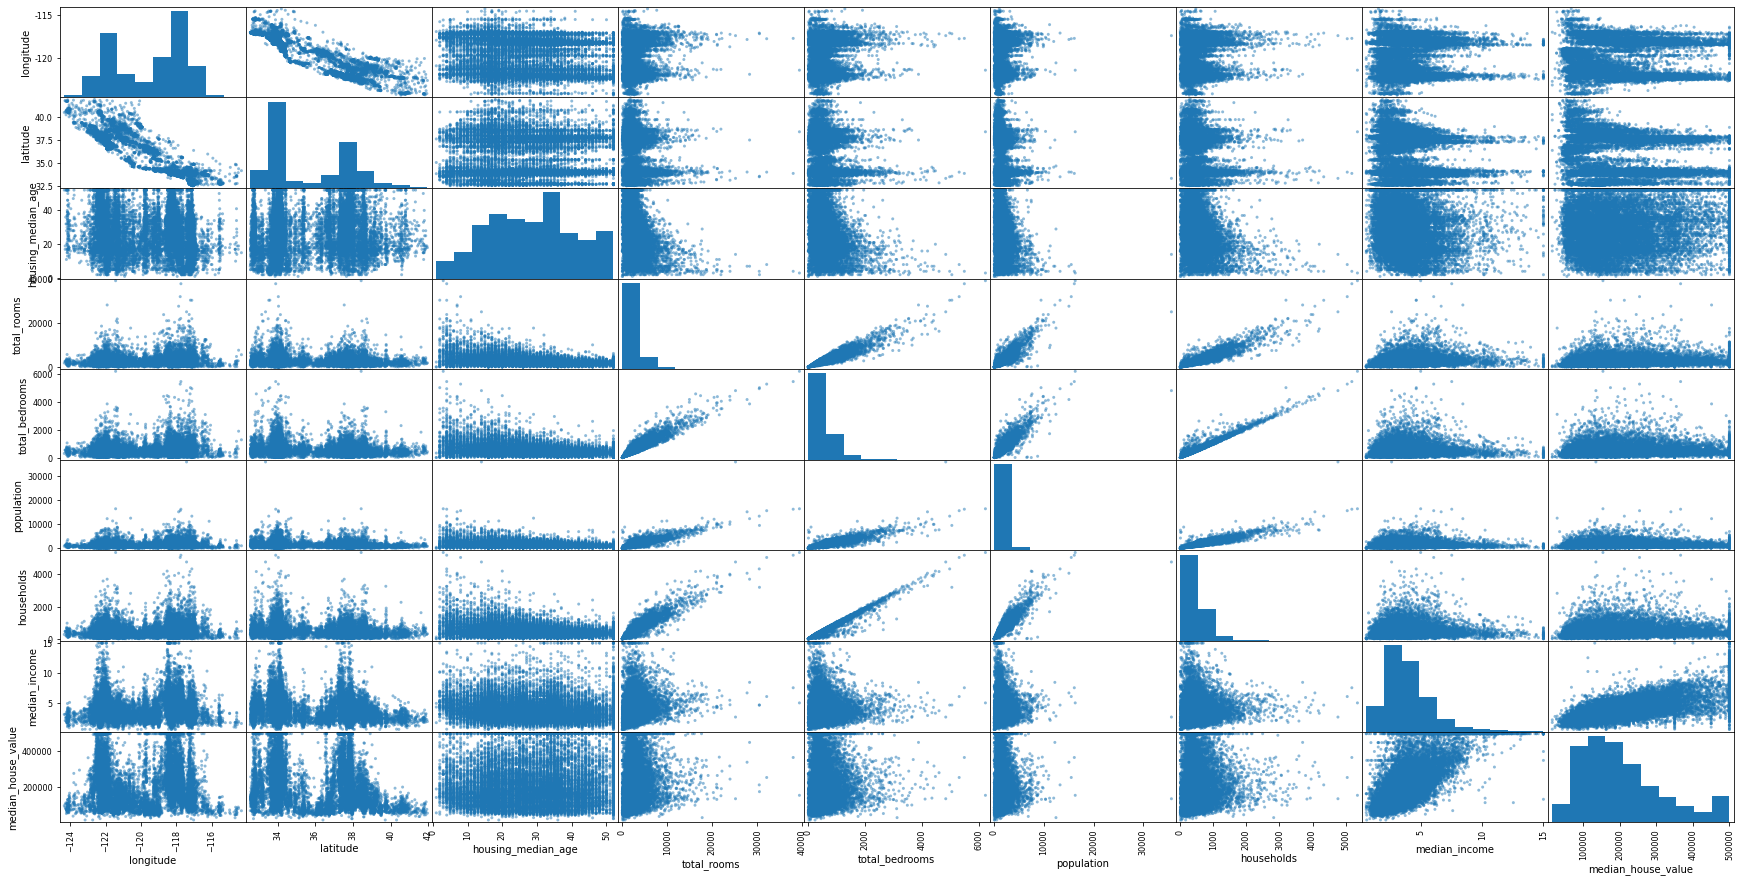

In [127]:
from pandas.plotting import scatter_matrix

# attributes = ["median_house_value", ]

scatter_matrix(housing, figsize=(30, 15));

covering the critical attributes to get a clear picture for the correlation among them.

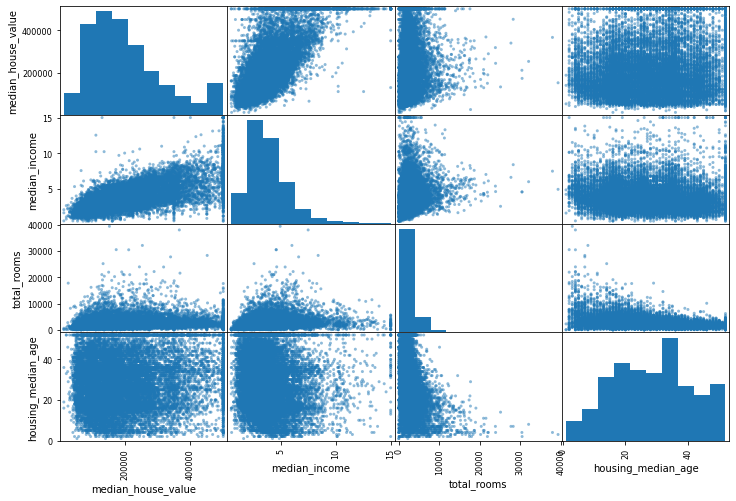

In [128]:
attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

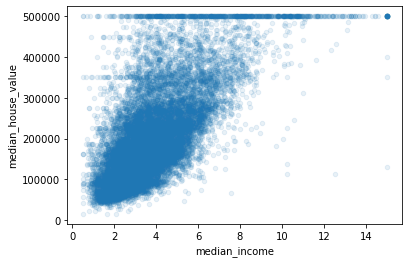

In [129]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

median income is highly correlated with the median house value, clearly could see it in the graph as the values are constantly increasing.

But there is a price cap at 500,000, then at 480,000, then at 350,000, then at 280,000. These cap could also get learnt by the algorithm, btter to remove them.

In [130]:
housing["room_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [131]:
corr_matrix=housing.corr()

In [132]:
corr_matrix["median_house_value"].sort_values(ascending=True)

bedrooms_per_room          -0.259984
latitude                   -0.142724
longitude                  -0.047432
population                 -0.026920
population_per_household   -0.021985
total_bedrooms              0.047689
households                  0.064506
housing_median_age          0.114110
total_rooms                 0.135097
room_per_household          0.146285
median_income               0.687160
median_house_value          1.000000
Name: median_house_value, dtype: float64

In [133]:
housing = strat_train_set.drop(["median_house_value"], axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [134]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [136]:
housing_cat=housing[["ocean_proximity"]]

In [137]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [138]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

There are multiple ways to handle the missing values data, 

1. Get rid of missing data values
2. Get rid of the whole attribute
3. Set the values to some value (zero, the mean, the median, etc.), this can be done one attribute at a time or efficiently by using the "SimpleImputer" class from Scikit-Learn


In [139]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Median can only be computed for the numerical attributes

In [140]:
housing_num=housing.drop("ocean_proximity", axis=1)

In [141]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [142]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [143]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [144]:
x = imputer.transform(housing_num)

In [145]:
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

In [146]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [147]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [150]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [151]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

one concern could be that for the encoded values for the category, the ML Algorithm will assume that the two nearby values are more similar than the two distant values; but in the this case of ocean_proximity the distant values are similar.

To avoid this, we can create a binary attribute per category, using One-hot Encoding, as one attribute equal to 1, while the other will be 0.

One attribute equal to 1, when the category value matches else 0

In [152]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [153]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]